## 1 - Introduction
Data Storytelling 

How do you create a data story? You’ve learned the basics, but the information is probably a bit abstract at this point. Keep in mind that storytelling is an art, so you have to get your imagination bubbling. In this project, you’ll learn some pointers to get those creative juices flowing. In the following sections, we’ll work step-by-step to create your first data story. 

Steps:
Ask the following questions and look for the answers using code and plots:
- Can you count something interesting?
- Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can you make a bar plot or a histogram?
- Can you compare two related quantities?
- Can you make a scatterplot?
- Can you make a time-series plot?

Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

In [23]:
!pip install plotly

     |████████████████████████████████| 7.1MB 2.6MB/s eta 0:00:01     |▌                               | 112kB 2.6MB/s eta 0:00:03     |███████████▌                    | 2.6MB 2.6MB/s eta 0:00:02     |███████████████▋                | 3.5MB 2.6MB/s eta 0:00:02
  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=5ce423a57615eaf9855d3f9f14e69113c7175f8d002acd1e55d4d772019950d9
  Stored in directory: /Users/cyuancheng/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import time
from scipy.stats import shapiro
import statsmodels.api as sm
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#%load_ext autoreload
#%autoreload 2

In [2]:
# read data
start = time.time()
path = '/Users/cyuancheng/Documents/course/Springboard/Capstone1/data/'
df = pd.read_csv(path+'LC_preprocessing.csv', low_memory=False, index_col=0, \
                 parse_dates=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year'] )
end = time.time()
print('It takes  ' + str(end-start) +' sec to read the data')

It takes  29.798328161239624 sec to read the data


In [3]:
# show missing data
df.isnull().sum()[df.isnull().sum() >0]

log_dti    2
dtype: int64

In [4]:
#Drop the row where at least one element is missing.
df['log_dti'].dropna(axis=0, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154551 entries, 0 to 2312457
Data columns (total 35 columns):
issue_d                1154551 non-null datetime64[ns]
earliest_cr_line       1154551 non-null datetime64[ns]
last_pymnt_d           1154551 non-null datetime64[ns]
issue_year             1154551 non-null datetime64[ns]
int_rate               1154551 non-null float64
revol_util             1154551 non-null float64
term                   1154551 non-null object
grade                  1154551 non-null object
emp_length             1154551 non-null object
home_ownership         1154551 non-null object
verification_status    1154551 non-null object
loan_status            1154551 non-null object
purpose                1154551 non-null object
addr_state             1154551 non-null object
loan_amnt              1154551 non-null float64
funded_amnt            1154551 non-null float64
installment            1154551 non-null float64
annual_inc             1154551 non-null float64
dti

## 2 - EDA

The dataset was download from [Lending Club](https://www.lendingclub.com/statistics/additional-statistics?). It contains information from 2015 to 2019. 

**Data manipulation**: 

    - Deal with missing value 
    - check each feature
        - observe distribution (normality for particular features)
        - Remove outliner (standard deviation)



In [6]:
df.head()

,issue_d,earliest_cr_line,last_pymnt_d,issue_year,int_rate,revol_util,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state,loan_amnt,funded_amnt,installment,annual_inc,dti,revol_bal,delinq_2yrs,open_acc,pub_rec,fico_range_high,fico_range_low,total_pymnt,recoveries,target,loan_period,log_annual_inc,log_dti,log_revol_bal,delinq_2yrs_str,pub_rec_str,fico
0,2015-12-01,2005-01-01,2018-08-01,2015-01-01,13.99,87.4,60 months,C,< 1 year,RENT,Source Verified,Fully Paid,credit_card,OH,21000.0,21000.0,488.53,52000.0,14.47,20374.0,0.0,5.0,0.0,684.0,680.0,27285.807861,0.0,0,32.000657,4.716003,1.160469,4.309076,0,0,684.0
3,2015-12-01,2002-04-01,2018-08-01,2015-01-01,6.49,34.5,36 months,A,6 years,RENT,Not Verified,Fully Paid,credit_card,PA,10000.0,10000.0,306.45,85000.0,13.07,10464.0,0.0,14.0,1.0,689.0,685.0,10998.971575,0.0,0,32.000657,4.929419,1.116276,4.019698,0,1,689.0
4,2015-12-01,1994-11-01,2017-04-01,2015-01-01,11.48,39.1,36 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,credit_card,RI,8000.0,8000.0,263.74,42000.0,34.80,7034.0,0.0,8.0,0.0,704.0,700.0,8939.580503,0.0,0,16.000329,4.623249,1.541579,3.847202,0,0,704.0
5,2015-12-01,1999-02-01,2017-01-01,2015-01-01,8.49,5.7,36 months,B,10+ years,MORTGAGE,Not Verified,Fully Paid,major_purchase,SC,20000.0,20000.0,631.26,85000.0,17.61,826.0,1.0,8.0,0.0,709.0,705.0,21538.508977,0.0,0,13.043389,4.929419,1.245759,2.916980,1,0,709.0
6,2015-12-01,1984-05-01,2017-05-01,2015-01-01,6.49,64.5,36 months,A,10+ years,MORTGAGE,Not Verified,Fully Paid,debt_consolidation,NC,28000.0,28000.0,858.05,92000.0,21.60,51507.0,0.0,16.0,0.0,724.0,720.0,29939.017729,0.0,0,16.985975,4.963788,1.334454,4.711866,0,0,724.0


### 1. Distrubution of loan and funded amount 

In [7]:
df['issue_year'] = df['issue_year'].dt.year

Text(0, 0.5, 'Average loan amount issued')

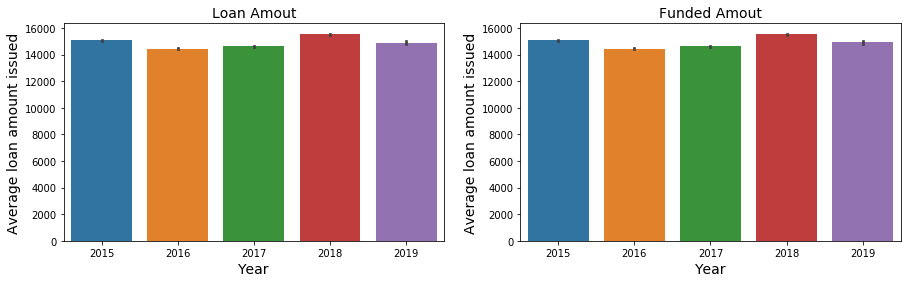

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
sns.barplot('issue_year', 'loan_amnt', data=df, palette='tab10', ax=ax1)
ax1.set_title('Loan Amout',fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average loan amount issued', fontsize=14)

sns.barplot('issue_year', 'funded_amnt', data=df, palette='tab10', ax=ax2)
ax2.set_title('Funded Amout',fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Average loan amount issued', fontsize=14)

Text(0, 0.5, 'Average loan amount issued')

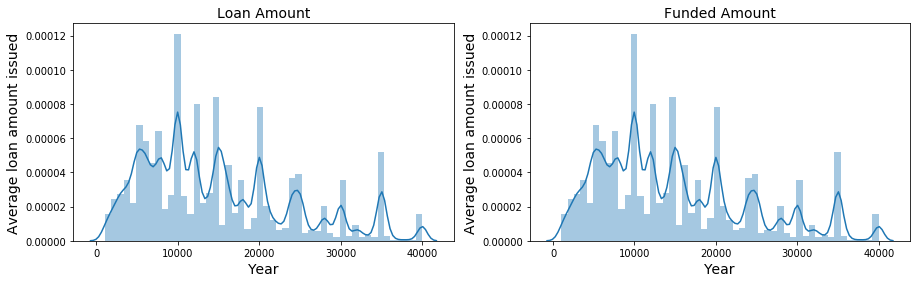

In [9]:
# Distribution for loan amount and funded amount
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,4))
sns.distplot(df['loan_amnt'].values, ax=ax1)
ax1.set_title('Loan Amount', fontsize=14)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average loan amount issued', fontsize=14)

sns.distplot(df['funded_amnt'].values, ax=ax2)
ax2.set_title('Funded Amount', fontsize=14)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Average loan amount issued', fontsize=14)


- The average amount of loan and fund issued is similar in past 5 years. 
- Most of the loan issued around $10000.
- The amount issued to the borrowers and the amount funded by investors have a similar distribution, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

### 2.  Good vs bad loan over year

In [ ]:
#df['loan_status']
sns.barplot('loan_status', data=df)
#ax1.set_title('Loan Amout',fontsize=14)
#ax1.set_xlabel('Year', fontsize=14)
#ax1.set_ylabel('Average loan amount issued', fontsize=14)


In [ ]:
# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# plotly.tools.set_credentials_file(username='AlexanderBach', api_key='o4fx6i1MtEIJQxfWYvU1')


### 3 states

In [33]:
states = df['addr_state'].unique()
print(states)

['OH' 'PA' 'RI' 'SC' 'NC' 'AZ' 'VA' 'NY' 'KS' 'AL' 'NM' 'TX' 'MD' 'WA'
 'GA' 'LA' 'IL' 'CO' 'FL' 'MI' 'MO' 'IN' 'WI' 'CA' 'VT' 'TN' 'MA' 'NJ'
 'OR' 'SD' 'MN' 'DC' 'DE' 'NH' 'NE' 'AR' 'NV' 'MT' 'WV' 'HI' 'OK' 'WY'
 'KY' 'CT' 'MS' 'UT' 'ND' 'ME' 'AK' 'ID']


In [34]:
df['addr_state'].nunique()

50

Census Bureau-designated regions and divisions
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States


In [35]:
# Make a list with each of the regions by state.

northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
midwest = ['IL','IN','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
south = ['DE','FL','GA','AZ','MD','NC','SC','VA','DC','WV','AL','KY','MS','TN','AR','LA','OK','TX']
west = ['CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
states_all = northeast + midwest + south + west
assert len(states_all) == 51


In [38]:
#set(states_all).intersection(set(states))

In [17]:
# add region column
df['region'] = np.nan

def finding_regions(state):
    if state in northeast:
        return 'northeast'
    elif state in midwest:
        return 'midwest'
    elif state in south:
        return 'south'
    elif state in west:
        return 'west'
    
df['region'] = df['addr_state'].apply(finding_regions)

In [198]:

df_state_loan_amnt = df.groupby(['region','addr_state'])['loan_amnt'].sum().sort_values(ascending=False).to_frame().reset_index()
df_state_income = df.groupby(['region','addr_state'])['annual_inc'].median().sort_values(ascending=False).to_frame().reset_index()

df_target = df.groupby(['region','addr_state'])['target'].value_counts(normalize=True).to_frame()
df_target = df_target.iloc[df_target.index.get_level_values('target') == 1]\
    .rename(columns={"target": "default_rate"}).reset_index().sort_values(by=["default_rate"], ascending=False)

Text(0, 0.5, 'Default rate')

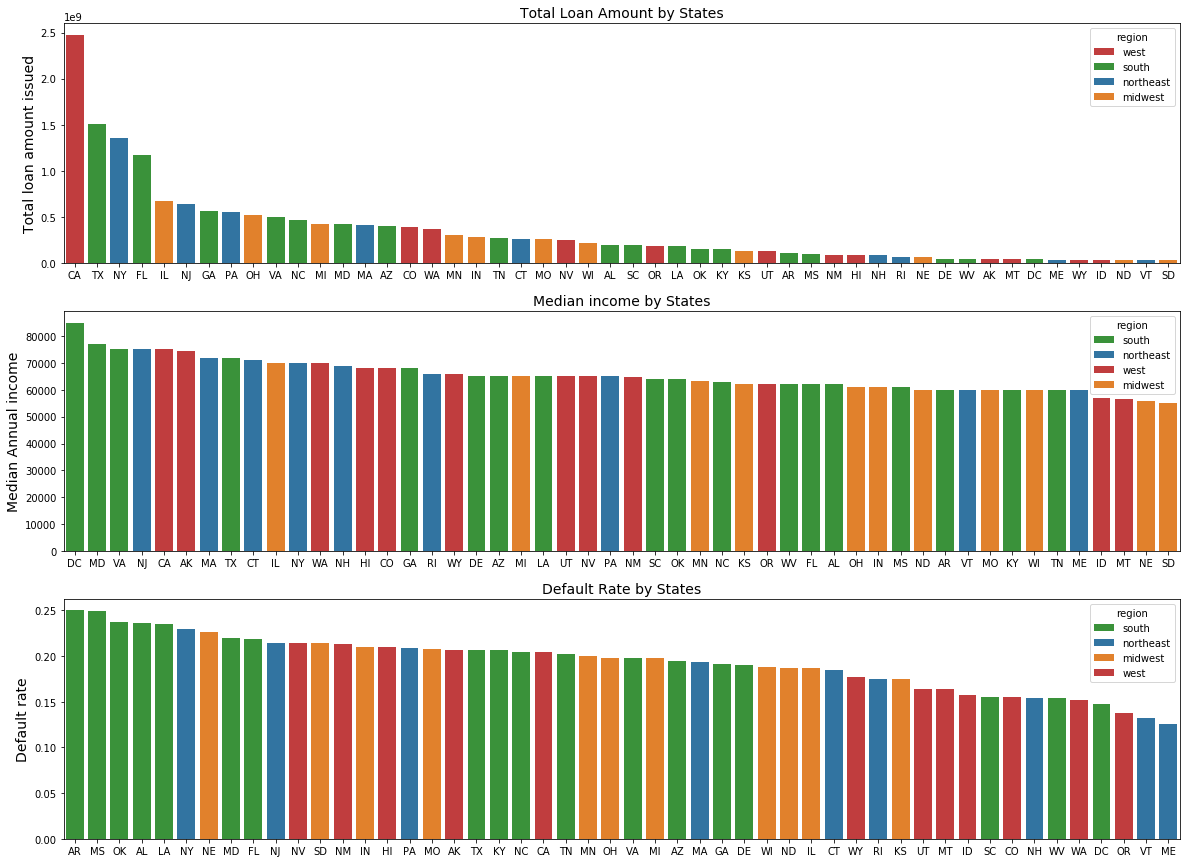

In [213]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, figsize=(20,15))

palette ={"northeast":"C0","midwest":"C1","south":"C2", "west":"C3"}

sns.barplot('addr_state', 'loan_amnt', hue='region', dodge=False, \
            data=df_state_loan_amnt,ax=ax1, palette=palette)
ax1.set_title('Total Loan Amount by States',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Total loan amount issued', fontsize=14)

sns.barplot('addr_state', 'annual_inc', hue='region',dodge=False, \
            data=df_state_income, ax=ax2, palette=palette) 
ax2.set_title('Median income by States',fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Median Annual income', fontsize=14)

sns.barplot('addr_state', 'default_rate', hue='region',dodge=False, \
            data=df_target, ax=ax3,palette=palette)
ax3.set_title('Default Rate by States',fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Default rate', fontsize=14)

Text(0, 0.5, 'Default rate')

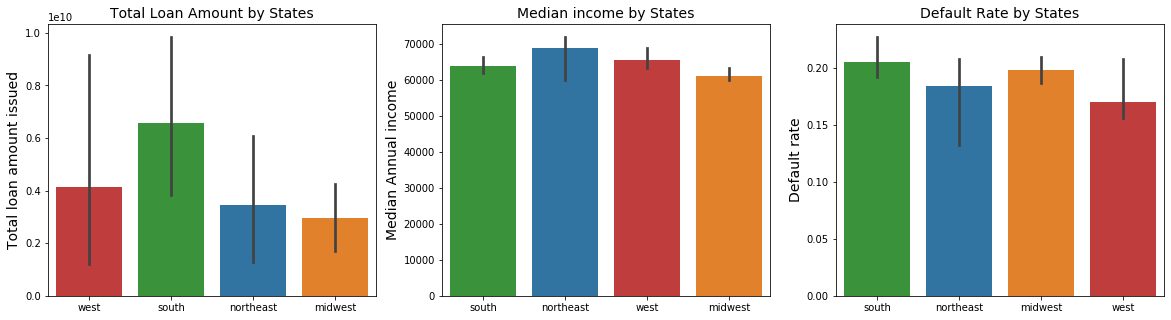

In [222]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, figsize=(20,5))

palette ={"northeast":"C0","midwest":"C1","south":"C2", "west":"C3"}

sns.barplot('region', 'loan_amnt', estimator=np.sum,\
            data=df_state_loan_amnt,ax=ax1, palette=palette)
ax1.set_title('Total Loan Amount by States',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Total loan amount issued', fontsize=14)

sns.barplot('region', 'annual_inc', estimator=np.median, \
            data=df_state_income, ax=ax2, palette=palette) 
ax2.set_title('Median income by States',fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Median Annual income', fontsize=14)

sns.barplot('region', 'default_rate', estimator=np.median,\
            data=df_target, ax=ax3,palette=palette)
ax3.set_title('Default Rate by States',fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Default rate', fontsize=14)

In [31]:
df.groupby('addr_state')['loan_amnt'].mean().sort_values(ascending=True)

addr_state
NE    13514.986858
VT    13610.301972
MT    13643.980037
AR    13833.861174
KY    13834.424096
          ...     
NJ    15581.996387
VA    15724.332100
HI    15759.069245
DC    15819.197761
AK    17033.368441
Name: loan_amnt, Length: 50, dtype: float64

,region,addr_state,annual_inc
0,south,DC,85000.0
1,south,MD,77000.0
2,south,VA,75000.0
3,northeast,NJ,75000.0
4,west,CA,75000.0


Text(0, 0.5, 'Average fico')

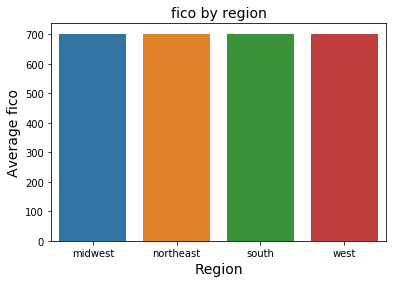

In [40]:
sns.barplot('region', 'fico', data=df)
plt.title('fico by region',fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Average fico', fontsize=14)

In [43]:
df.groupby('region')['fico'].mean().sort_values(ascending=True)

region
west         701.033997
south        701.078206
midwest      701.269858
northeast    702.049231
Name: fico, dtype: float64

In [64]:
df.groupby(['region'])['loan_status'].value_counts(normalize=True)#.sort_values(ascending=False)

region     loan_status
midwest    Fully Paid     0.803337
           Charged Off    0.196663
northeast  Fully Paid     0.789714
           Charged Off    0.210286
south      Fully Paid     0.791852
           Charged Off    0.208148
west       Fully Paid     0.809990
           Charged Off    0.190010
Name: loan_status, dtype: float64

In [39]:
df.columns#['addr_state']

Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'issue_year', 'int_rate',
       'revol_util', 'term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti',
       'revol_bal', 'delinq_2yrs', 'open_acc', 'pub_rec', 'fico_range_high',
       'fico_range_low', 'total_pymnt', 'recoveries', 'target', 'loan_period',
       'log_annual_inc', 'log_dti', 'log_revol_bal', 'delinq_2yrs_str',
       'pub_rec_str', 'fico', 'region'],
      dtype='object')

### 3 maps

In [68]:
# Now it comes the part where we plot out plotly United States map
import plotly as py
import plotly.graph_objs as go


In [71]:
group_loan_amnt = df.groupby('addr_state')['loan_amnt'].sum().sort_values()


In [72]:
group_loan_amnt

addr_state
SD    3.303305e+07
VT    3.312748e+07
ND    3.330028e+07
ID    3.589325e+07
WY    3.664650e+07
          ...     
IL    6.793398e+08
FL    1.176397e+09
NY    1.354495e+09
TX    1.510895e+09
CA    2.474906e+09
Name: loan_amnt, Length: 50, dtype: float64

In [ ]:
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).interest_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()